In [1]:
import numpy as np
from ulmo.models import DCAE, ConditionalFlow
from ulmo.ood import ProbabilisticAutoencoder

In [2]:
f = np.load('../data/processed/MODIS_night_data_100clear_48x48_mean_norm.npz')
data, metadata = f['train_fields'][:, None, :, :], f['train_meta']

In [3]:
data.shape, metadata.shape

((20037, 1, 48, 48), (20037, 4))

In [4]:
autoencoder = DCAE(input_channels=1, latent_dim=512)

In [5]:
flow = ConditionalFlow(
    dim=512, 
    context_dim=None, 
    transform_type='autoregressive', 
    n_layers=10, 
    hidden_units=256,
    n_blocks=2, 
    dropout=0.2, 
    use_batch_norm=False, 
    tails='linear', 
    tail_bound=10, 
    n_bins=5,
    min_bin_height=1e-3, 
    min_bin_width=1e-3, 
    min_derivative=1e-3, 
    unconditional_transform=False, 
    encoder=None)

In [6]:
pae = ProbabilisticAutoencoder(autoencoder=autoencoder, flow=flow, data=data, metadata=metadata)

In [7]:
pae.train_autoencoder(10, 64, 2.5e-3)

Training on 19,036 samples. Validating on 1,001 samples.


In [8]:
pae.train_flow(5, 64, 2.5e-4)

Training on 19,036 samples. Validating on 1,001 samples.


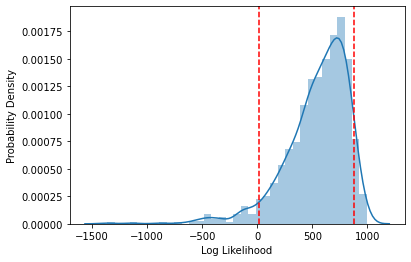

In [9]:
pae.plot_log_probs()

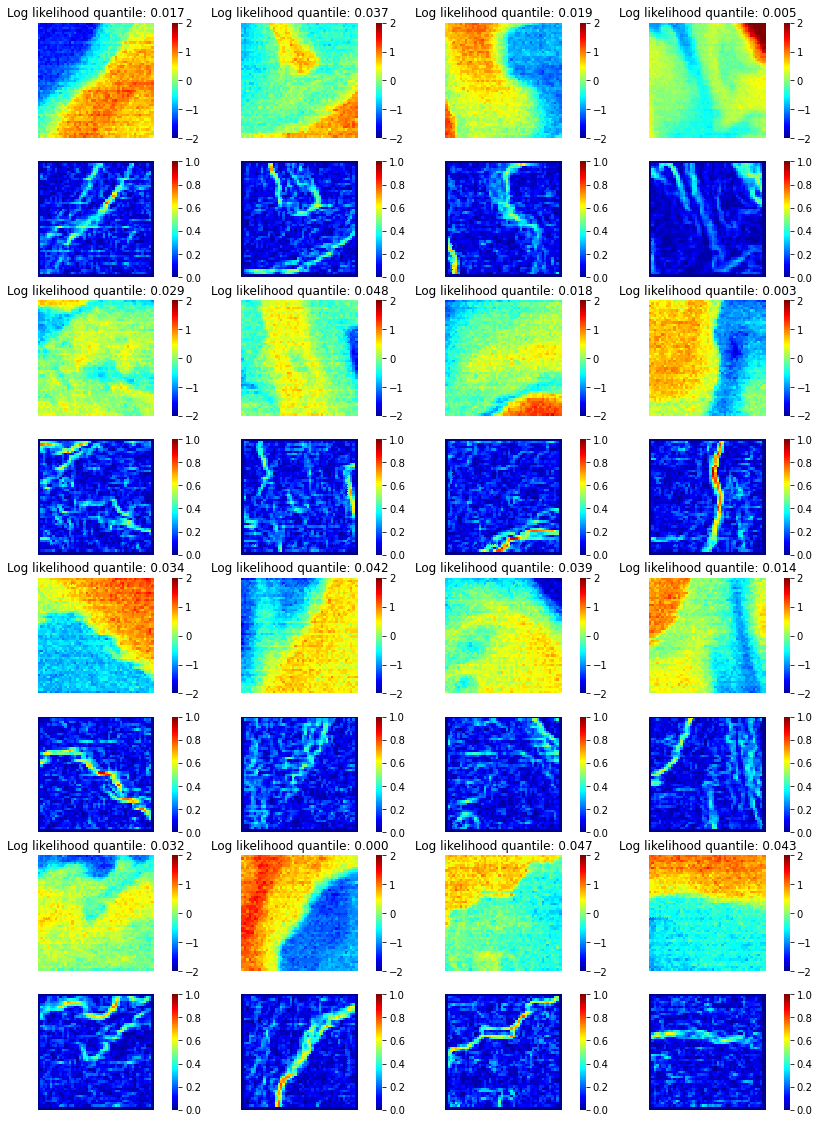

In [10]:
pae.plot_random('outliers')

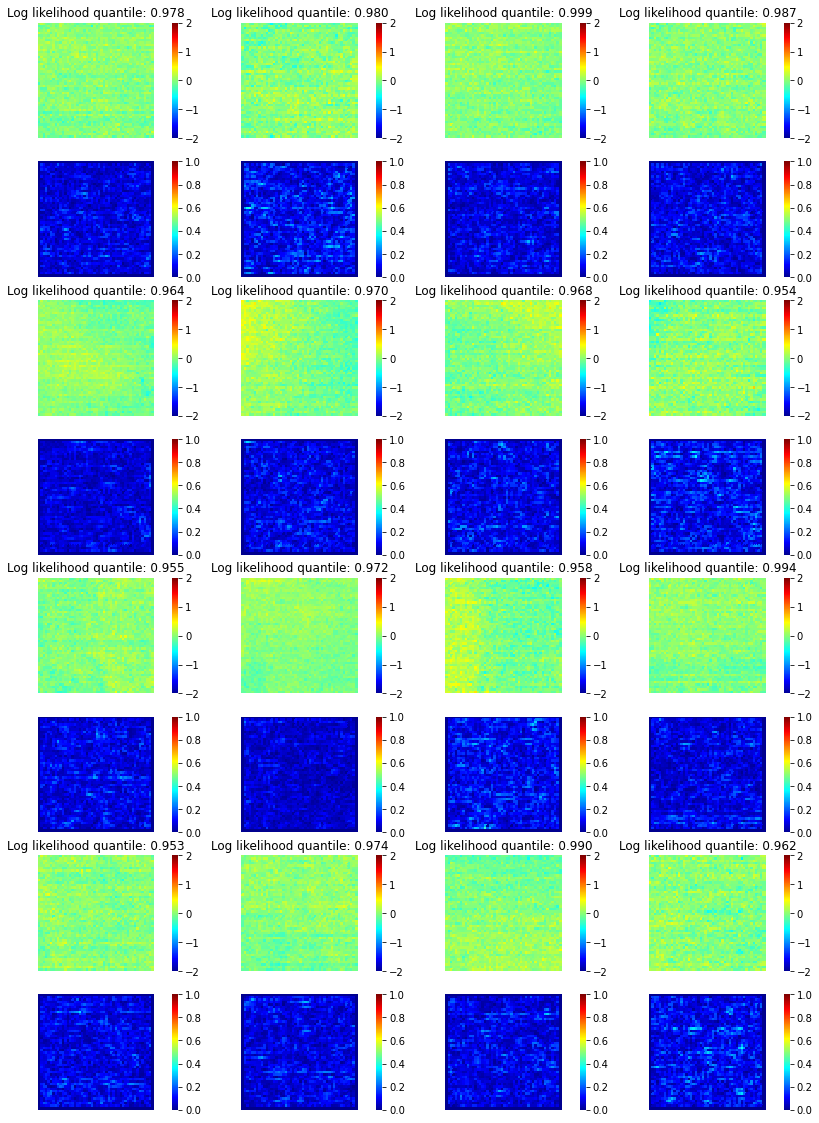

In [11]:
pae.plot_random('inliers')